In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"D:\Datascince_Project\Sales Prediction\Data\ads.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

 **Data Profiling and Inspection**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isna()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

The dataset has 0 null values.

**missing data handling**

<Axes: >

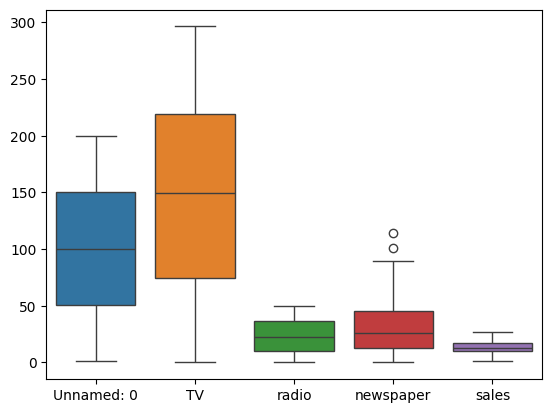

In [9]:
# vizualizing the outlier
sns.boxplot(df)

In [10]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

The column name "Unamed:0 " store only number of the rows data so let's drop this column.

In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [22]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

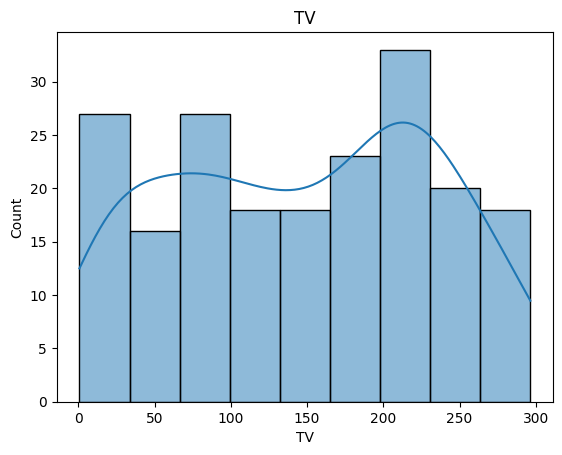

In [25]:
sns.histplot(df['TV'], kde=True)
plt.title('TV')
plt.show()

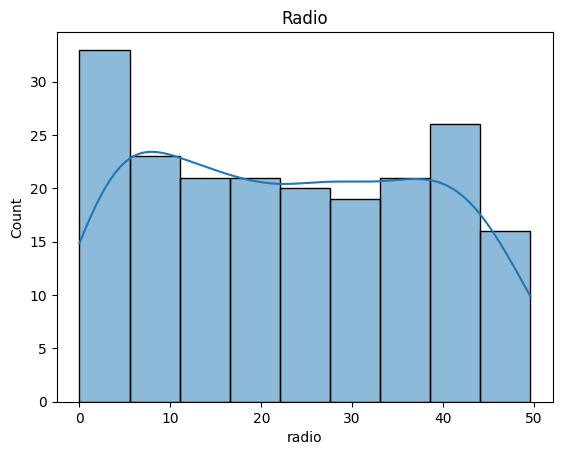

In [24]:
sns.histplot(df['radio'],kde=True)
plt.title('Radio')
plt.show()

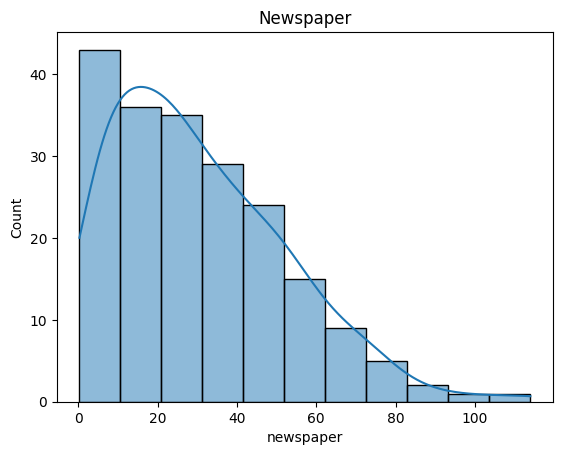

In [26]:
sns.histplot(df['newspaper'],kde=True)
plt.title('Newspaper')
plt.show()

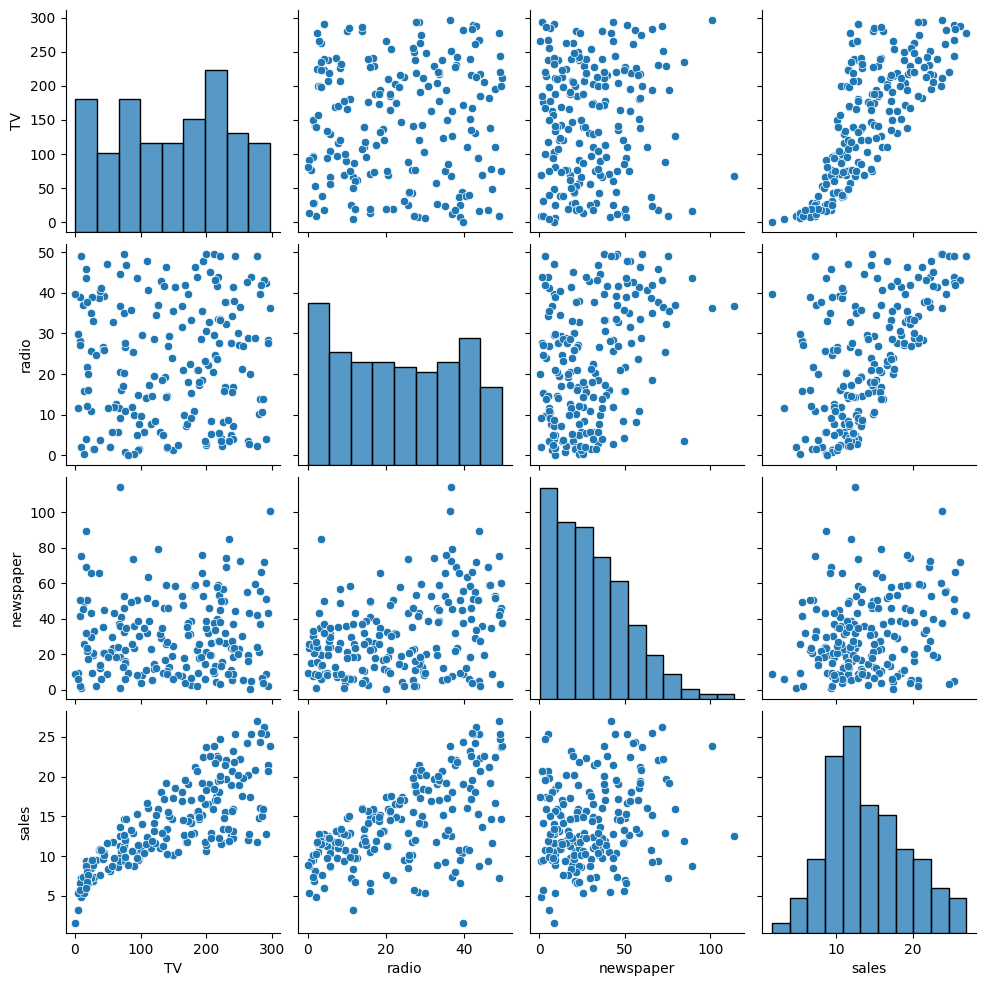

In [38]:
sns.pairplot(df)
plt.show()

* Dependent variable(y) => Sales
* Independent  Variable (x) => TV,radio, newspaper

**Feature selection**

<Axes: >

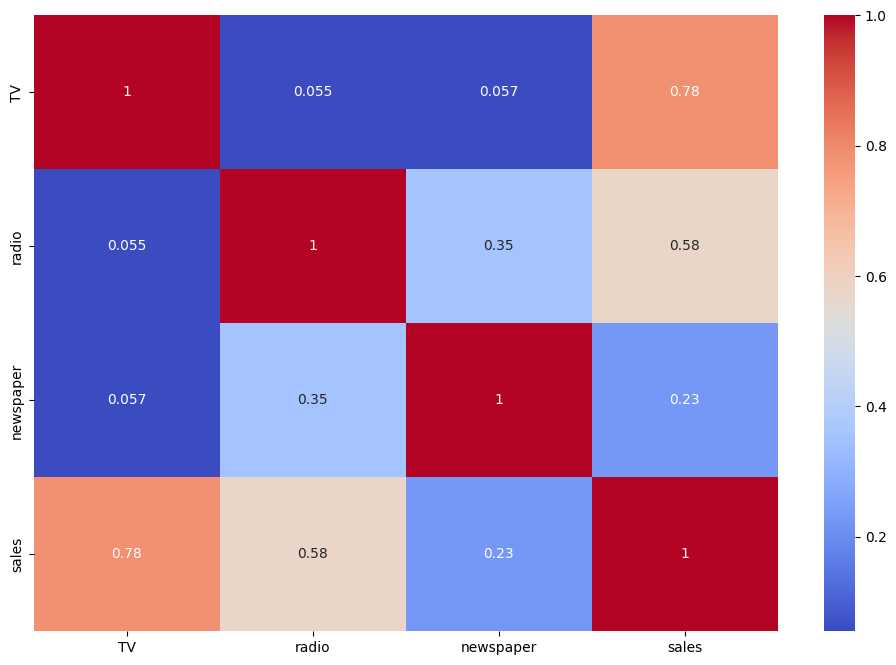

In [40]:
ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap = 'coolwarm')

* The target variable sales (y) has +ve correlaton to TV with 0.78 , 0.58 with radio and 0.23 with newspaper.

now , we use TV as a independent variable because Tv is more correlated with sales.

In [41]:
X = df['TV']
y = df.sales

In [42]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [44]:
# converting 1d array to 2d array
X_array = np.array(X)
X = X_array.reshape(-1,1)

In [45]:
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

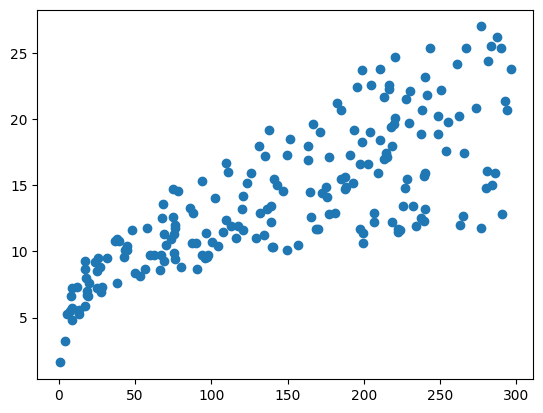

In [47]:
# ploting the scatterplot
plt.scatter(x=X, y=y)
plt.show()

**Training the model using single LinearRegression, Lasso and Ridge**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [51]:
# LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)
y_pred1=lrmodel.predict(X_test)
print(f'Slop = {lrmodel.coef_}')
print(f'Intercept = {lrmodel.intercept_}')

Slop = [0.04652973]
Intercept = 7.119638430592953


In [52]:
# Ridge
r_model = Ridge()
r_model.fit(X_train,y_train)
y_pred2=r_model.predict(X_test)
print(f'Slop = {r_model.coef_}')
print(f'Intercept = {r_model.intercept_}')

Slop = [0.04652969]
Intercept = 7.119644590887544


In [53]:
# Lasso
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
y_pred3=lasso_model.predict(X_test)
print(f'Slop = {lasso_model.coef_}')
print(f'Intercept = {lasso_model.intercept_}')

Slop = [0.04638853]
Intercept = 7.140821616610217


the above regression has almost same slop and intercept values .

**Evaluation of Metrics**

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
# In LinearRegression
print(f'Mean Squared Error :{ mean_squared_error(y_test, y_pred1)}')
print(f'mean Absolute Error : {mean_absolute_error(y_test, y_pred2)}')
print(f'Root Mean Squared Errror: {r2_score(y_test, y_pred2)}')

Mean Squared Error :10.204654118800956
mean Absolute Error : 2.4444210257774612
Root Mean Squared Errror: 0.6766953358517285


In [60]:
# In Ridge
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred2)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred2)}')
print(f'Root Mean Squred Error : {r2_score(y_test, y_pred2)}')

Mean Squared Error : 10.204657076656229
Mean Absolute Error : 2.4444210257774612
Root Mean Squred Error : 0.6766953358517285


In [62]:
# In Lasso
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred3)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred3)}')
print(f'Root Mean Squared Error : {r2_score(y_test, y_pred3)}')

Mean Squared Error : 10.2149923598731
Mean Absolute Error : 2.4479344096653333
Root Mean Squared Error : 0.6763678926810068


**Visualize**


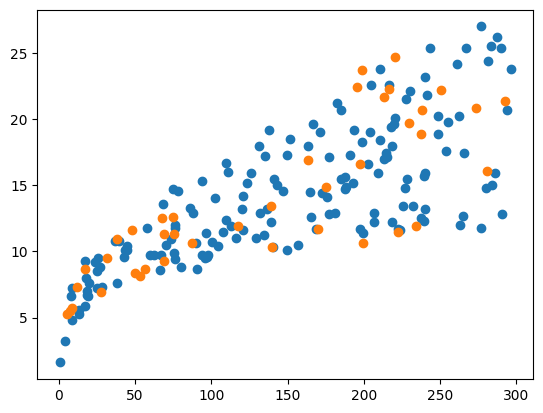

In [64]:
plt.scatter(X_train,y_train,label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.show()

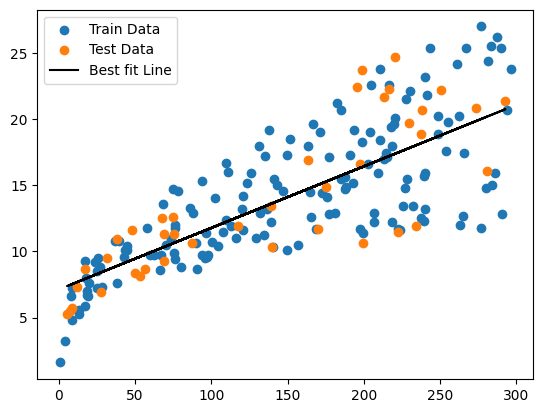

In [71]:
plt.scatter(X_train, y_train, label='Train Data')
plt.scatter(X_test,y_test,label='Test Data')
plt.plot(X_test, y_pred1,label='Best fit Line',color='black')
plt.legend()
plt.show()

# **Using Multiple Regression**

In [73]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [74]:
X= df.drop(columns='sales')
y=df.sales

In [75]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [79]:
# In LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
y_predict1 = linr.predict(X_test)

# In Ridge
rr = Ridge()
rr.fit(X_train, y_train)
y_predict2 = rr.predict(X_test)

# In Lasso
lar = Lasso()
lar.fit(X_train, y_train)
y_predict3 = lar.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
# In LinearRegression
print(f'Mean Squared Error : {mean_squared_error(y_test, y_predict1)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_predict1)}')
print(f'Root Mean Squred Error : {r2_score(y_test, y_predict1)}')


Mean Squared Error : 3.174097353976104
Mean Absolute Error : 1.4607567168117603
Root Mean Squred Error : 0.899438024100912


In [84]:
# In Ridge
print(f'Mean Squared Error : {mean_squared_error(y_test, y_predict2)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_predict2)}')
print(f'Root Mean Squred Error : {r2_score(y_test, y_predict2)}')

Mean Squared Error : 3.1740948120927324
Mean Absolute Error : 1.4607656112869645
Root Mean Squred Error : 0.89943810463304


In [86]:
# In Lasso
print(f'Mean Squared Error : {mean_squared_error(y_test, y_predict3)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_predict3)}')
print(f'Root Mean Squred Error : {r2_score(y_test, y_predict3)}')

Mean Squared Error : 3.1436915053679364
Mean Absolute Error : 1.452202278593457
Root Mean Squred Error : 0.9004013443377963


**Serialization**

In [88]:
# import pickle
# with open('modelLinear.pickle','wb') as file:
#     pickle.dump(modelLinear,file)